In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from fitting_functions.extra_lineshapes import magnon
from fitting_functions.extra_models import MagnonModel, Zero2LinearModel
import lmfit
#, paramagnon, zero2Linear

#from fitting_functions.extra_lineshapes import magnon, paramagnon, zero2Linear

%matplotlib nbagg

In [2]:
x, y = np.loadtxt('LSCO_30_LH_grazout.txt', unpack=True,skiprows=1)

choose = np.logical_and(x>-1.2, x<1)
x = x[choose] * -1
y = y[choose]
e = np.sqrt(y+100)*0.3
#fig, ax = plt.subplots()
#ax.plot(x, y)

<IPython.core.display.Javascript object>


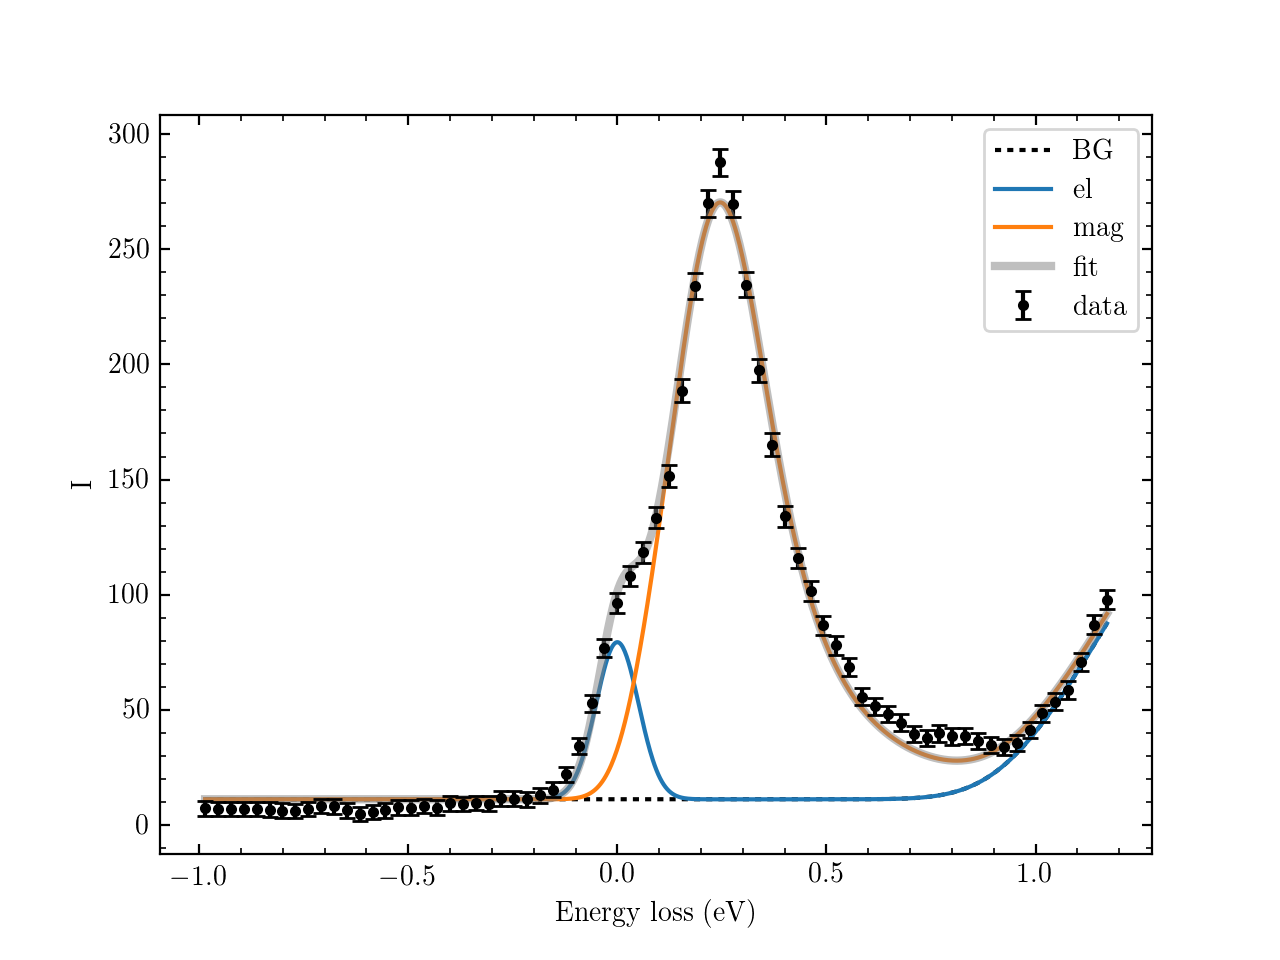

In [3]:
model = (lmfit.models.GaussianModel(prefix='el_') + MagnonModel(prefix='mag_')
         + Zero2LinearModel(prefix='dd_') + lmfit.models.ConstantModel())
params = model.make_params()

fwhm =2*np.sqrt(2*np.log(2))
res = 0.12/fwhm
                    
params['el_center'].set(value=0, vary=False)
params['el_amplitude'].set(value=1)
params['el_sigma'].set(value=res, vary=False)

params['mag_center'].set(value=.35)
params['mag_sigma'].set(value=.05)
params['mag_amplitude'].set(value=20)


params['mag_res'].set(value=res, vary=False)
params['mag_kBT'].set(value=8.617e-5*25, vary=False)

params['dd_sigma'].set(value=0.12, vary=False)
params['dd_center'].set(value=1.)
params['dd_grad'].set(value=100)

params['c'].set(value=7.5)

#fig, ax = plt.subplots()
#initial_fit = model.eval(params=params, x=x)
#ax.plot(x, initial_fit, '-')
#ax.errorbar(x, y, e, fmt='.')

result = model.fit(y, x=x, params=params)

fig, ax = plt.subplots()

x_fit = np.linspace(x.min(), x.max(), 1000)

components = result.eval_components(x=x_fit)
constant = components.pop('constant')
slope = components.pop('dd_')

BG = constant + slope

ax.plot(x_fit, BG, 'k:', label='BG')
for model_name, model_value in components.items():
    ax.plot(x_fit, model_value + BG, '-', label=model_name.strip('_'))

y_fit = result.eval(**result.best_values, x=x_fit)
ax.plot(x_fit, y_fit, color=[0.5]*3, label='fit', lw=3, alpha=0.5)
ax.errorbar(x, y, e, fmt='k.', label='data')

ax.set_xlabel('Energy loss (eV)')
ax.set_ylabel('I')
ax.legend()